<a href="https://colab.research.google.com/github/holdenkim/codingT/blob/main/BBGS_Part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#맛보기1 분류문제

#분석 데이터 검토

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("breast-cancer-wisconsin.csv")

In [3]:
data.head()

,code,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   code                         683 non-null    int64
 1   Clump_Thickness              683 non-null    int64
 2   Cell_Size                    683 non-null    int64
 3   Cell_Shape                   683 non-null    int64
 4   Marginal_Adhesion            683 non-null    int64
 5   Single_Epithelial_Cell_Size  683 non-null    int64
 6   Bare_Nuclei                  683 non-null    int64
 7   Bland_Chromatin              683 non-null    int64
 8   Normal_Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB


In [5]:
data.describe()

,code,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,0.349927
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.477296
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,1.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


특성 나누기

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = data[data.columns[1:10]]
y= data[data.columns[10:]]

In [8]:
print(X.shape)
print(y.shape)

(683, 9)
(683, 1)


train test 나누기


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, stratify=y)

In [10]:
print(y_train.mean())
print(y_test.mean())

Class    0.349609
dtype: float64
Class    0.350877
dtype: float64


정규화

In [11]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [12]:
mms= MinMaxScaler()
mms.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [13]:
X_scaled_minmax_train = mms.transform(X_train)
X_scaled_minmax_test = mms.transform(X_test)

In [14]:
pd.DataFrame(X_scaled_minmax_train).describe()

,0,1,2,3,4,5,6,7,8
count,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000
mean,0.372830,0.231988,0.242839,0.205078,0.241319,0.285590,0.269314,0.199002,0.067491
std,0.317836,0.334781,0.332112,0.319561,0.242541,0.404890,0.265289,0.331503,0.190373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.111111,0.000000,0.000000,0.000000,0.111111,0.000000,0.111111,0.000000,0.000000
50%,0.333333,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.000000
75%,0.555556,0.361111,0.444444,0.333333,0.333333,0.583333,0.444444,0.222222,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
pd.DataFrame(X_scaled_minmax_test).describe()

,0,1,2,3,4,5,6,7,8
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,0.411306,0.259909,0.256010,0.198181,0.269006,0.274204,0.278752,0.233918,0.065627
std,0.298847,0.357544,0.332700,0.315307,0.259557,0.405891,0.292578,0.360958,0.199372
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000
50%,0.444444,0.000000,0.111111,0.000000,0.111111,0.000000,0.222222,0.000000,0.000000
75%,0.555556,0.444444,0.444444,0.222222,0.388889,0.444444,0.444444,0.388889,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


모델 학습 로지스틱 리스레션

In [16]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_scaled_minmax_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
pred_train = model.predict(X_scaled_minmax_train)
pred_test = model.predict(X_scaled_minmax_test)

In [18]:
print(model.score(X_scaled_minmax_train, y_train))
print(model.score(X_scaled_minmax_test, y_test))

0.97265625
0.9590643274853801


모델평가

In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
cm = confusion_matrix(y_test,pred_test )

In [21]:
print(cm)

[[106   5]
 [  2  58]]


In [22]:
from sklearn.metrics import classification_report

In [23]:
cr = classification_report(y_test,pred_test)
print(cr)

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       111
           1       0.92      0.97      0.94        60

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [25]:
from sklearn.metrics import auc, roc_curve
from sklearn import metrics
false_positive_rate, true_positive_rate, threshold = roc_curve(
    y_test, model.decision_function(X_scaled_minmax_test)
)
roc_auc = metrics.roc_auc_score(
    y_test, model.decision_function(X_scaled_minmax_test)
)

In [26]:
roc_auc

0.9923423423423423

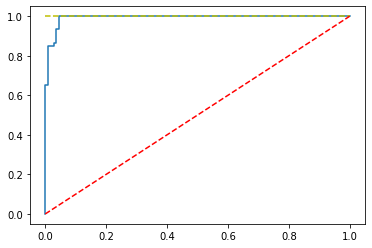

In [38]:
import matplotlib.pyplot as plt
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1],[1,1],'y--')
plt.plot([0,1],[0,1],'r--')

예측값 병합 및 저장

In [51]:
print(y_train.shape)
print(pred_train.shape)

(512, 4)
(512,)


In [52]:
proba_train = model.predict_proba(X_scaled_minmax_train)
proba_test = model.predict_proba(X_scaled_minmax_test)

y_train[["y_pred"]]= pred_train
y_train[["y_proba0","y_proba1"]]= proba_train

#y_test[["y_pred"]]= pred_test
y_test[["y_proba0","y_proba1"]]= proba_test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

# 맛보기 2 회귀문제

In [53]:
import pandas as pd

In [54]:
data = pd.read_csv('house_price.csv')

In [55]:
data.head(2)

,housing_age,income,bedrooms,households,rooms,house_value
0,23,6.7770,0.141112,2.442244,8.103960,500000
1,49,6.0199,0.160984,2.726688,5.752412,500000


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17689 entries, 0 to 17688
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   housing_age  17689 non-null  int64  
 1   income       17689 non-null  float64
 2   bedrooms     17689 non-null  float64
 3   households   17689 non-null  float64
 4   rooms        17689 non-null  float64
 5   house_value  17689 non-null  int64  
dtypes: float64(4), int64(2)
memory usage: 829.3 KB


In [57]:
data.describe()

,housing_age,income,bedrooms,households,rooms,house_value
count,17689.000000,17689.000000,17689.000000,17689.000000,17689.000000,17689.000000
mean,27.378823,3.671141,0.213278,2.952117,5.244001,189043.439313
std,11.280230,1.525937,0.051167,0.731573,1.184922,95487.122628
min,1.000000,0.499900,0.100000,0.750000,1.640000,14999.000000
25%,18.000000,2.532900,0.177464,2.470270,4.426829,114400.000000
50%,28.000000,3.453900,0.204104,2.854962,5.190779,171100.000000
75%,36.000000,4.591800,0.240157,3.316092,5.953728,242700.000000
max,51.000000,9.905500,0.498127,6.954023,11.901869,500000.000000


In [68]:
X = data[["housing_age","income","bedrooms","households","rooms"]]
y = data[["house_value"]]

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [71]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [72]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.5706921210926263
0.5826083517811866
